# Imports & Functions

In [ ]:
# Installing libraries required
!pip install mat73
!pip install ewtpy
!pip install scaleogram

In [ ]:
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
from scipy.io import loadmat
from scipy import signal
import mat73

import random
import pywt
import gc
import scaleogram as scg 

from skimage.transform import resize
from skimage import data, color
import ewtpy

from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight


import keras
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.callbacks import History 

import tensorflow as tf
from tensorflow.keras.layers import Conv2D,Dense,Flatten,GlobalMaxPooling2D,MaxPooling2D,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

import itertools

from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.recurrent import LSTM
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Concatenate,Average



In [ ]:
def make_confusion_matrix(y_true,y_pred,classes=None, figsize=(10,10),text_size=15):
        """
        # Note: The following confusion matrix code is a remix of Scikit-Learn's 
        # plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
        # and Made with ML's introductory notebook - https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
        """
    
        cm = confusion_matrix(y_true, tf.round(y_pred))
        cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
        n_classes = cm.shape[0]

        fig, ax = plt.subplots(figsize=figsize)
        cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
        fig.colorbar(cax)

        if classes:
            labels = classes
        else:
            labels = np.arange(cm.shape[0])


        ax.set(title="Confusion Matrix",
                xlabel="Predicted label",
                ylabel="True label",
                xticks=np.arange(n_classes),
                yticks=np.arange(n_classes),
                xticklabels=labels,
                yticklabels=labels)

    
        ax.xaxis.set_label_position("bottom")
        ax.xaxis.tick_bottom()

        ax.xaxis.label.set_size(text_size)
        ax.yaxis.label.set_size(text_size)
        ax.title.set_size(text_size)

    
        threshold = (cm.max() + cm.min()) / 2.


        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                    horizontalalignment="center",
                    color="white" if cm[i, j] > threshold else "black",
                    size=text_size)

In [ ]:
X_train_hma=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_train.npy")
X_test_hma=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_test.npy")
X_val_hma=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/X_val.npy")
y_train_hma=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_train.npy")
y_test_hma=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_test.npy")
y_val_hma=np.load("/content/drive/MyDrive/FYP_FINAL/HMA/y_val.npy")

X_train_ibf=np.load("/content/drive/MyDrive/FYP_FINAL/IBF/X_train.npy")
X_test_ibf=np.load("/content/drive/MyDrive/FYP_FINAL/IBF/X_test.npy")
X_val_ibf=np.load("/content/drive/MyDrive/FYP_FINAL/IBF/X_val.npy")
y_train_ibf=np.load("/content/drive/MyDrive/FYP_FINAL/IBF/y_train.npy")
y_test_ibf=np.load("/content/drive/MyDrive/FYP_FINAL/IBF/y_test.npy")
y_val_ibf=np.load("/content/drive/MyDrive/FYP_FINAL/IBF/y_val.npy")

X_train_ohbf=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_train.npy")
X_test_ohbf=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_test.npy")
X_val_ohbf=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/X_val.npy")
y_train_ohbf=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_train.npy")
y_test_ohbf=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_test.npy")
y_val_ohbf=np.load("/content/drive/MyDrive/FYP_FINAL/OHBF/y_val.npy")

X_train_uhbf=np.load("/content/drive/MyDrive/FYP_FINAL/UHBF/X_train.npy")
X_test_uhbf=np.load("/content/drive/MyDrive/FYP_FINAL/UHBF/X_test.npy")
X_val_uhbf=np.load("/content/drive/MyDrive/FYP_FINAL/UHBF/X_val.npy")
y_train_uhbf=np.load("/content/drive/MyDrive/FYP_FINAL/UHBF/y_train.npy")
y_test_uhbf=np.load("/content/drive/MyDrive/FYP_FINAL/UHBF/y_test.npy")
y_val_uhbf=np.load("/content/drive/MyDrive/FYP_FINAL/UHBF/y_val.npy")

X_train_vma=np.load("/content/drive/MyDrive/FYP_FINAL/VMA/X_train.npy")
X_test_vma=np.load("/content/drive/MyDrive/FYP_FINAL/VMA/X_test.npy")
X_val_vma=np.load("/content/drive/MyDrive/FYP_FINAL/VMA/X_val.npy")
y_train_vma=np.load("/content/drive/MyDrive/FYP_FINAL/VMA/y_train.npy")
y_test_vma=np.load("/content/drive/MyDrive/FYP_FINAL/VMA/y_test.npy")
y_val_vma=np.load("/content/drive/MyDrive/FYP_FINAL/VMA/y_val.npy")

In [ ]:
X_hma=np.vstack((X_train_hma,X_test_hma,X_val_hma))
y_hma=np.vstack((y_train_hma.reshape(-1,1),y_test_hma.reshape(-1,1),y_val_hma.reshape(-1,1)))

X_ibf=np.vstack((X_train_ibf,X_test_ibf,X_val_ibf))
y_ibf=np.vstack((y_train_ibf.reshape(-1,1),y_test_ibf.reshape(-1,1),y_val_ibf.reshape(-1,1)))

X_ohbf=np.vstack((X_train_ohbf,X_test_ohbf,X_val_ohbf))
y_ohbf=np.vstack((y_train_ohbf.reshape(-1,1),y_test_ohbf.reshape(-1,1),y_val_ohbf.reshape(-1,1)))

X_uhbf=np.vstack((X_train_uhbf,X_test_uhbf,X_val_uhbf))
y_uhbf=np.vstack((y_train_uhbf.reshape(-1,1),y_test_uhbf.reshape(-1,1),y_val_uhbf.reshape(-1,1)))

X_vma=np.vstack((X_train_vma,X_test_vma,X_val_vma))
y_vma=np.vstack((y_train_vma.reshape(-1,1),y_test_vma.reshape(-1,1),y_val_vma.reshape(-1,1)))

In [ ]:
X_hma.shape,y_hma.shape, X_ibf.shape,y_ibf.shape, X_ohbf.shape,y_ohbf.shape, X_uhbf.shape,y_uhbf.shape, X_vma.shape,y_vma.shape

((4920, 1000, 8),
 (4920, 1),
 (7640, 1000, 8),
 (7640, 1),
 (11240, 1000, 8),
 (11240, 1),
 (12140, 1000, 8),
 (12140, 1),
 (7000, 1000, 8),
 (7000, 1))

In [ ]:
def cleaner(x,y):
  cleaned_array =[]
  normal_array = []
  idx = np.where(y != 0)[0]
  normal = np.where(y == 0)[0]
  
  for i in range(len(x)):
    if i in normal:
      normal_array.append(x[i])

    else:
      cleaned_array.append(x[i])

  return np.array(normal_array),np.array(cleaned_array)



In [ ]:
cleaner(X_hma,y_hma)[1].shape

(3940, 1000, 8)

In [ ]:
cleaner(X_hma,y_hma)[0].shape

(980, 1000, 8)

In [ ]:
cleaner(X_vma,y_vma)[0].shape

(980, 1000, 8)

In [ ]:
cleaner(X_vma,y_vma)[1].shape

(6020, 1000, 8)

In [ ]:
cleaner(X_uhbf,y_uhbf)[0].shape

(980, 1000, 8)

In [ ]:
cleaner(X_uhbf,y_uhbf)[1].shape

(11160, 1000, 8)

In [ ]:
cleaner(X_ohbf,y_ohbf)[0].shape

(980, 1000, 8)

In [ ]:
cleaner(X_ohbf,y_ohbf)[1].shape

(10260, 1000, 8)

In [ ]:
X_normal = cleaner(X_hma,y_hma)[0] # Cz normal set is same for all

X_hma = cleaner(X_hma,y_hma)[1]

X_ibf=cleaner(X_ibf,y_ibf)[1]

X_ohbf=cleaner(X_ohbf,y_ohbf)[1]

X_uhbf=cleaner(X_uhbf,y_uhbf)[1]

X_vma=cleaner(X_vma,y_vma)[1]


In [ ]:
X_normal.shape, X_hma.shape, X_ibf.shape, X_ohbf.shape, X_uhbf.shape, X_vma.shape

((980, 1000, 8),
 (3940, 1000, 8),
 (6660, 1000, 8),
 (10260, 1000, 8),
 (11160, 1000, 8),
 (6020, 1000, 8))

In [ ]:
X = np.vstack((X_normal,X_hma,X_ibf,X_ohbf,X_uhbf,X_vma))
X.shape

(39020, 1000, 8)

In [ ]:
y_0 = pd.DataFrame(np.zeros(int(len(X_normal)),dtype=int))
y_1 = pd.DataFrame(np.ones(int(len(X_hma)),dtype=int))
y_2 = pd.DataFrame(np.full((int(len(X_ibf)),1),2))
y_3 = pd.DataFrame(np.full((int(len(X_ohbf)),1),3))
y_4 = pd.DataFrame(np.full((int(len(X_uhbf)),1),4))
y_5 = pd.DataFrame(np.full((int(len(X_vma)),1),5))
y = pd.concat([y_0,y_1,y_2,y_3,y_4,y_5], ignore_index=True).to_numpy()

In [ ]:
y.shape

(39020, 1)

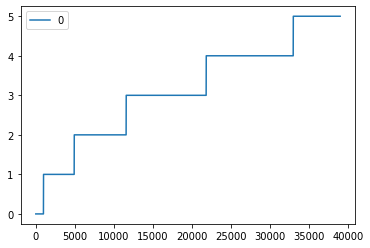

In [ ]:
pd.DataFrame(y).plot()

In [ ]:
X,y=shuffle(X, y)

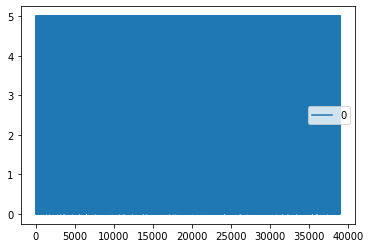

In [ ]:
pd.DataFrame(y).plot()

In [ ]:
np.unique(y,return_counts= True)

(array([0, 1, 2, 3, 4, 5]), array([  980,  3940,  6660, 10260, 11160,  6020]))

In [ ]:
# all_variables = dir()
  
# # Iterate over the whole list where dir( )
# # is stored.
# for name in all_variables:
    
#     # Print the item if it doesn't start with '__'
#     if not name.startswith('__'):
#         myvalue = eval(name)
#         print(name, "is", type(myvalue))

In [ ]:
del X_hma 
del X_ibf 
del X_normal 
del X_ohbf
del X_uhbf


In [ ]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

# train is now 75% of the entire data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1 - train_ratio,stratify=y)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),stratify=y_test) 


In [ ]:
np.save("/content/drive/MyDrive/FYP_FINAL/FINAL/full_X_train",X_train)
np.save("/content/drive/MyDrive/FYP_FINAL/FINAL/full_X_test",X_test)
np.save("/content/drive/MyDrive/FYP_FINAL/FINAL/full_X_val",X_val)

np.save("/content/drive/MyDrive/FYP_FINAL/FINAL/full_y_train",y_train)
np.save("/content/drive/MyDrive/FYP_FINAL/FINAL/full_y_test",y_test)
np.save("/content/drive/MyDrive/FYP_FINAL/FINAL/full_y_val",y_val)

#Modelling


In [ ]:
X_train=np.load("/content/drive/MyDrive/FYP_FINAL/FINAL/full_X_train.npy")
X_test=np.load("/content/drive/MyDrive/FYP_FINAL/FINAL/full_X_test.npy")
X_val=np.load("/content/drive/MyDrive/FYP_FINAL/FINAL/full_X_val.npy")

y_train=np.load("/content/drive/MyDrive/FYP_FINAL/FINAL/full_y_train.npy")
y_test=np.load("/content/drive/MyDrive/FYP_FINAL/FINAL/full_y_test.npy")
y_val=np.load("/content/drive/MyDrive/FYP_FINAL/FINAL/full_y_val.npy")

In [ ]:
X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape

((27313, 1000, 8),
 (5854, 1000, 8),
 (5853, 1000, 8),
 (27313, 1),
 (5854, 1),
 (5853, 1))

In [ ]:
num_classes=6
n_timesteps=1000
n_features=8

In [ ]:
class_weights  = class_weight.compute_class_weight('balanced',classes = np.unique(y_train),y=y_train.reshape(-1,))

In [ ]:
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 6.63581146744412,
 1: 1.6505317863185884,
 2: 0.9764407264407264,
 3: 0.633829945233454,
 4: 0.5827892288652755,
 5: 1.0802483784211359}

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)
y_val = keras.utils.np_utils.to_categorical(y_val, num_classes)

In [ ]:
# batch_size = 32
# epochs =100

# train_size = X_train.shape[0]
# val_size=X_val.shape[0]
# test_size= X_test.shape[0]

In [ ]:
# model = Sequential()
# model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(n_timesteps,n_features)))
# model.add(Dropout(0.2))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
# model.add(Dropout(0.2))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
# model.add(Dropout(0.2))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(num_classes, activation='softmax'))
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
# checkpoint=ModelCheckpoint("/content/trained_model/full_final_base_CNN.hd5",monitor="val_loss",mode="min",
#                            save_best_only=True,verbose=1)

# earlystop=EarlyStopping(monitor="val_loss",min_delta=0,patience=6,verbose=1,restore_best_weights=True)

# reduce_lr=ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=2,verbose=1,min_delta=0.0001)

# callbacks=[checkpoint,earlystop,reduce_lr]

In [ ]:
batch_size = 16
epochs =100

train_size = X_train.shape[0]
val_size=X_val.shape[0]
test_size= X_test.shape[0]

In [ ]:
alpha = 0.4
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha), input_shape=(n_timesteps,n_features)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=2, activation=tf.keras.layers.LeakyReLU(alpha)))
# model.add(Dropout(0.3))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha)))
model.add(Dropout(0.35))
model.add(Dense(64, activation=tf.keras.layers.LeakyReLU(alpha)))
model.add(Dropout(0.35))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 999, 128)          2176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 499, 128)         0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 498, 64)           16448     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 249, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 248, 32)           4128      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 124, 32)          0

In [ ]:
checkpoint=ModelCheckpoint("/content/trained_model/full_base_CNN.hd5",monitor="val_loss",mode="min",
                           save_best_only=True,verbose=1)

earlystop=EarlyStopping(monitor="val_loss",min_delta=0,patience=8,verbose=1,restore_best_weights=True)

reduce_lr=ReduceLROnPlateau(monitor="val_loss",factor=0.2,patience=3,verbose=1,min_delta=0.0001)

callbacks=[checkpoint,earlystop,reduce_lr]

In [ ]:
history = model.fit(X_train, y_train,steps_per_epoch=train_size//batch_size,
          batch_size=batch_size,
          epochs=epochs, validation_steps=val_size//batch_size,
          validation_data=(X_val, y_val),class_weight=class_weights,
          callbacks=callbacks)
 

Epoch 1/100
1706/1707 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.7973
Epoch 1: val_loss improved from inf to 0.19442, saving model to /content/trained_model/full_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


1707/1707 [==============================] - 23s 7ms/step - loss: 0.6916 - accuracy: 0.7974 - val_loss: 0.1944 - val_accuracy: 0.9384 - lr: 0.0010
Epoch 2/100
1697/1707 [============================>.] - ETA: 0s - loss: 0.3092 - accuracy: 0.9312
Epoch 2: val_loss improved from 0.19442 to 0.04941, saving model to /content/trained_model/full_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


1707/1707 [==============================] - 13s 7ms/step - loss: 0.3079 - accuracy: 0.9315 - val_loss: 0.0494 - val_accuracy: 0.9851 - lr: 0.0010
Epoch 3/100
1702/1707 [============================>.] - ETA: 0s - loss: 0.1891 - accuracy: 0.9574
Epoch 3: val_loss did not improve from 0.04941
1707/1707 [==============================] - 11s 7ms/step - loss: 0.1891 - accuracy: 0.9574 - val_loss: 0.0657 - val_accuracy: 0.9796 - lr: 0.0010
Epoch 4/100
1700/1707 [============================>.] - ETA: 0s - loss: 0.1377 - accuracy: 0.9699
Epoch 4: val_loss did not improve from 0.04941
1707/1707 [==============================] - 10s 6ms/step - loss: 0.1373 - accuracy: 0.9700 - val_loss: 0.0510 - val_accuracy: 0.9842 - lr: 0.0010
Epoch 5/100
1697/1707 [============================>.] - ETA: 0s - loss: 0.1375 - accuracy: 0.9721
Epoch 5: val_loss did not improve from 0.04941

Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1707/1707 [==============================] 

INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


1707/1707 [==============================] - 11s 7ms/step - loss: 0.0307 - accuracy: 0.9935 - val_loss: 0.0201 - val_accuracy: 0.9928 - lr: 2.0000e-04
Epoch 7/100
1702/1707 [============================>.] - ETA: 0s - loss: 0.0148 - accuracy: 0.9967
Epoch 7: val_loss improved from 0.02011 to 0.01626, saving model to /content/trained_model/full_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


1707/1707 [==============================] - 11s 7ms/step - loss: 0.0148 - accuracy: 0.9967 - val_loss: 0.0163 - val_accuracy: 0.9949 - lr: 2.0000e-04
Epoch 8/100
1702/1707 [============================>.] - ETA: 0s - loss: 0.0101 - accuracy: 0.9979
Epoch 8: val_loss did not improve from 0.01626
1707/1707 [==============================] - 10s 6ms/step - loss: 0.0101 - accuracy: 0.9978 - val_loss: 0.0385 - val_accuracy: 0.9902 - lr: 2.0000e-04
Epoch 9/100
1707/1707 [==============================] - ETA: 0s - loss: 0.0119 - accuracy: 0.9973
Epoch 9: val_loss did not improve from 0.01626
1707/1707 [==============================] - 10s 6ms/step - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0362 - val_accuracy: 0.9863 - lr: 2.0000e-04
Epoch 10/100
1702/1707 [============================>.] - ETA: 0s - loss: 0.0100 - accuracy: 0.9982
Epoch 10: val_loss did not improve from 0.01626

Epoch 10: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
1707/1707 [=================

INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


1707/1707 [==============================] - 12s 7ms/step - loss: 0.0032 - accuracy: 0.9993 - val_loss: 0.0128 - val_accuracy: 0.9971 - lr: 4.0000e-05
Epoch 12/100
1701/1707 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9995
Epoch 12: val_loss improved from 0.01278 to 0.01125, saving model to /content/trained_model/full_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


1707/1707 [==============================] - 12s 7ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0113 - val_accuracy: 0.9974 - lr: 4.0000e-05
Epoch 13/100
1706/1707 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998
Epoch 13: val_loss did not improve from 0.01125
1707/1707 [==============================] - 10s 6ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0129 - val_accuracy: 0.9976 - lr: 4.0000e-05
Epoch 14/100
1697/1707 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9997
Epoch 14: val_loss did not improve from 0.01125
1707/1707 [==============================] - 10s 6ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0131 - val_accuracy: 0.9962 - lr: 4.0000e-05
Epoch 15/100
1699/1707 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9998
Epoch 15: val_loss did not improve from 0.01125

Epoch 15: ReduceLROnPlateau reducing learning rate to 8.000000525498762e-06.
1707/1707 [==============

INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


1707/1707 [==============================] - 11s 7ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.0107 - val_accuracy: 0.9983 - lr: 8.0000e-06
Epoch 19/100
1700/1707 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9997
Epoch 19: val_loss improved from 0.01071 to 0.01029, saving model to /content/trained_model/full_base_CNN.hd5


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


INFO:tensorflow:Assets written to: /content/trained_model/full_base_CNN.hd5/assets


1707/1707 [==============================] - 11s 6ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0103 - val_accuracy: 0.9983 - lr: 8.0000e-06
Epoch 20/100
1702/1707 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9997
Epoch 20: val_loss did not improve from 0.01029
1707/1707 [==============================] - 10s 6ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.0105 - val_accuracy: 0.9981 - lr: 8.0000e-06
Epoch 21/100
1700/1707 [============================>.] - ETA: 0s - loss: 6.1980e-04 - accuracy: 0.9999
Epoch 21: val_loss did not improve from 0.01029
1707/1707 [==============================] - 10s 6ms/step - loss: 6.1745e-04 - accuracy: 0.9999 - val_loss: 0.0109 - val_accuracy: 0.9981 - lr: 8.0000e-06
Epoch 22/100
1701/1707 [============================>.] - ETA: 0s - loss: 6.4610e-04 - accuracy: 0.9999
Epoch 22: val_loss did not improve from 0.01029

Epoch 22: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
1707/1707 [=

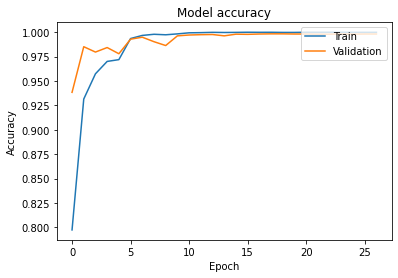

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

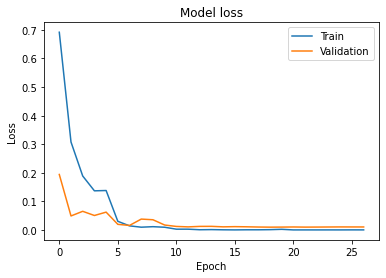

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
class_names=["Normal","HMA","IBF","OHBF","UHBF","VMA"]

In [ ]:
y_pred_probs=model.predict(X_test)
y_true= np.argmax(y_test,axis=1)

In [ ]:
y_pred=np.argmax(y_pred_probs,axis=1)

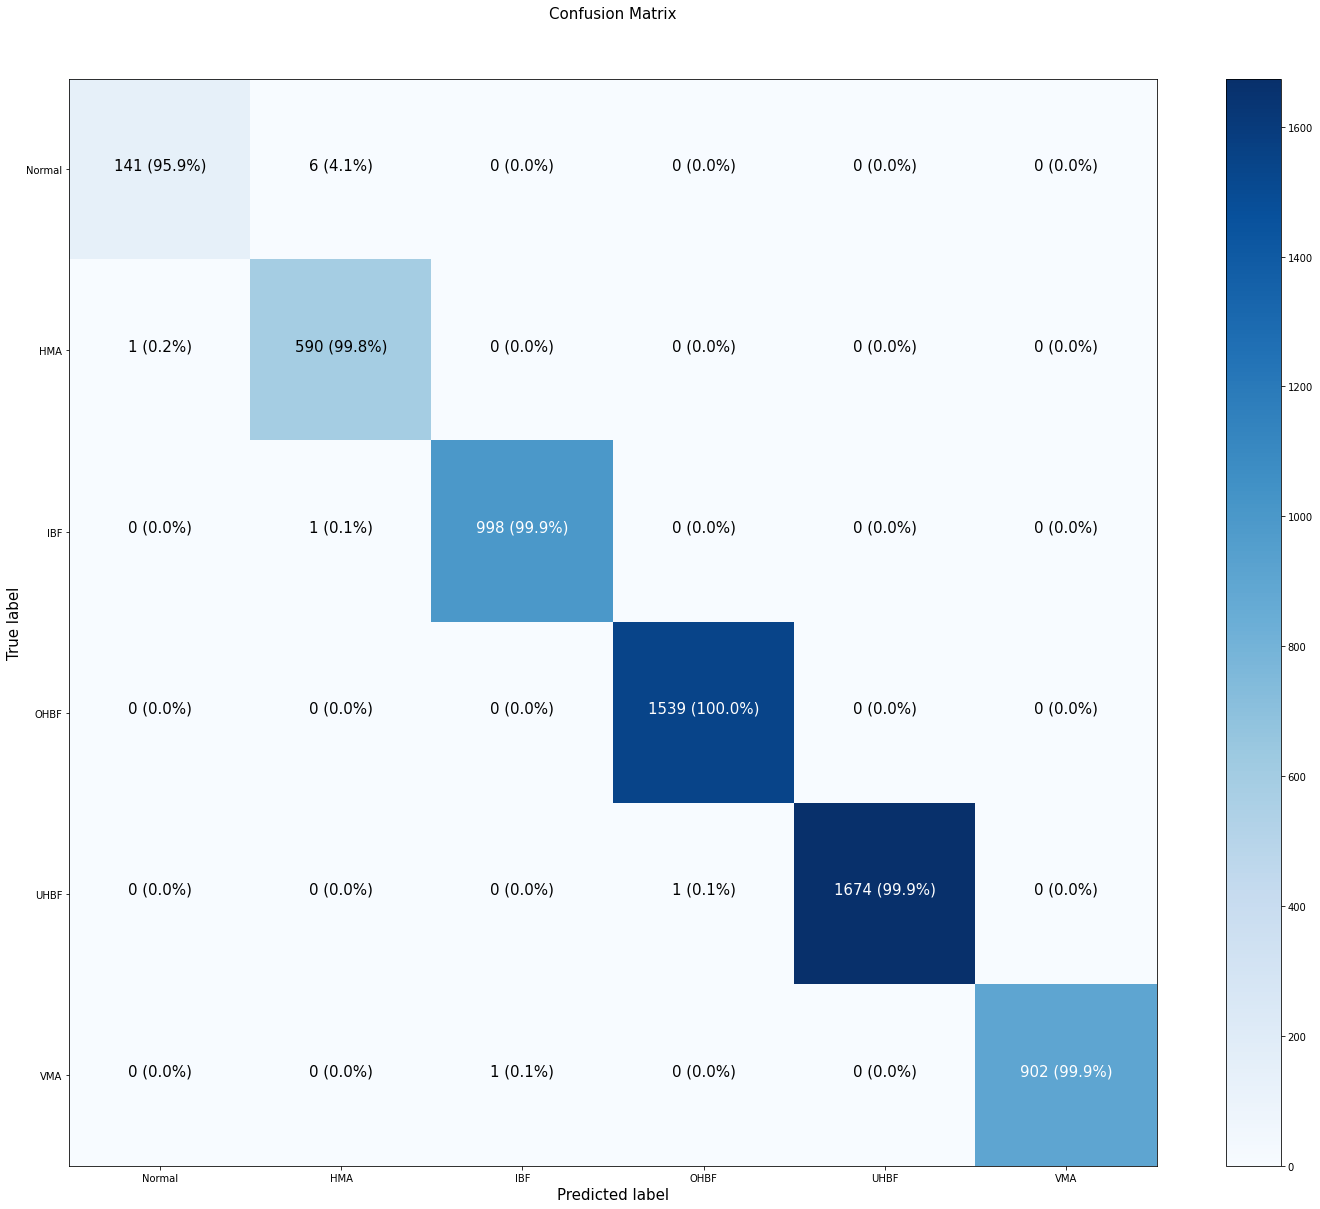

In [ ]:
make_confusion_matrix(y_true,y_pred,classes=class_names,figsize=(25,20))

In [ ]:
print(classification_report(y_true,y_pred,target_names=class_names))

              precision    recall  f1-score   support

      Normal       0.99      0.96      0.98       147
         HMA       0.99      1.00      0.99       591
         IBF       1.00      1.00      1.00       999
        OHBF       1.00      1.00      1.00      1539
        UHBF       1.00      1.00      1.00      1675
         VMA       1.00      1.00      1.00       903

    accuracy                           1.00      5854
   macro avg       1.00      0.99      0.99      5854
weighted avg       1.00      1.00      1.00      5854



In [ ]:
model.evaluate(X_test,y_test)

183/183 [==============================] - 1s 5ms/step - loss: 0.0081 - accuracy: 0.9983


[0.0081194918602705, 0.9982917904853821]

In [ ]:
!zip -r /content/drive/MyDrive/FYP_FINAL/FINAL/full_cnn_trained_model_apr.zip /content/trained_model

updating: content/trained_model/ (stored 0%)
  adding: content/trained_model/full_base_CNN.hd5/ (stored 0%)
  adding: content/trained_model/full_base_CNN.hd5/variables/ (stored 0%)
  adding: content/trained_model/full_base_CNN.hd5/variables/variables.index (deflated 67%)
  adding: content/trained_model/full_base_CNN.hd5/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/trained_model/full_base_CNN.hd5/assets/ (stored 0%)
  adding: content/trained_model/full_base_CNN.hd5/keras_metadata.pb (deflated 92%)
  adding: content/trained_model/full_base_CNN.hd5/saved_model.pb (deflated 89%)
